# CIA 1

## Problem Statement:

Implement multi-arm bandit to improve genetic algorithms.


In [319]:
import numpy as np
import matplotlib.pyplot as plt

In [320]:
def stochastic_choice(ppln, fittest, s, n, choice):
    
    if choice <s:
    
        best = ppln[fittest]
        rand = ppln[np.random.randint(0,n)]
        
        recombine = np.concatenate((best[:choice], rand[choice:]), axis=0)
        
        ppln = np.concatenate((ppln, recombine.reshape(-1,1).T), axis=0)
    
    else:
        rand = ppln[np.random.randint(0,n)]
    
        rand[choice-s] = (rand[choice-s]+1)%2
        recombine = rand.reshape(-1,1).T
        
        ppln = np.concatenate((ppln, recombine.reshape(-1,1).T), axis=0)
    return ppln
    

In [321]:
def genetic_v(n: int, s: int, epoch = 1000):

# tracking avg score over generations.
    
    score_hist = []

# initializing ga variables
    
    ppln = np.random.randint(0,2,(n,s))
    fit = np.sum(ppln, axis=1)
    score = max(fit)
    fittest = np.where(fit == score)[0][0]

# epoch loop
    
    for _ in range(epoch):
        
# increase in vanilla ga occurs stochastically
        
        choice = np.random.randint(0,2*s)
        ppln = stochastic_choice(ppln, fittest, s, n, choice)

# killing off the weakest.
        
        x = np.sum(ppln, axis=1)
        t =  np.where(x == min(x))[0][0]
        ppln = ppln[np.where(np.arange(x.shape[0]) != t)]
# update values
        
        fit = np.sum(ppln, axis=1)
        score = max(fit)
        fittest = np.where(fit == score)[0][0]
        score_hist.append(np.mean(fit))

# returning the fitness record over generations.
# 
    return np.asarray(score_hist), ppln[fittest]

In [322]:
def genetic_mab(n: int, s: int, epoch = 1000, greed = 0.01, max_greed = 0.8):
# tracking avg score over generations.
    
    score_hist = []
    bandit_scores = [[] for _ in range(2*s)]

# initializing ga variables
    
    ppln = np.random.randint(0,2,(n,s))
    fit = np.sum(ppln, axis=1)
    score = max(fit)
    fittest = np.where(fit == score)[0][0]

# initializing the bandit variables

    eav = np.zeros((2*s))          # arms are created for possible recombinations and random possible mutation at each position.
    instances = np.zeros((2*s))
    greedy = 0
    
# epoch loop
    
    for _ in range(epoch):

        r = np.random.rand()

        choice = 0

        if r < greedy:

            choice = np.where(eav == max(eav))[0][0]             # greedily choose change in the generation.
            ppln = stochastic_choice(ppln, fittest, s, n, choice) 
            
        else:

            choice = np.random.randint(0,2*s)                    # stochastically choose the change in the generation. 
            ppln = stochastic_choice(ppln, fittest, s, n, choice)
# killing off the weakest.
        
        x = np.sum(ppln, axis=1)
        t =  np.where(x == min(x))[0][0]
        ppln = ppln[np.where(np.arange(x.shape[0]) != t)]

# update ga values
        
        fit = np.sum(ppln, axis=1)
        old_score = score
        score = max(fit)
        fittest = np.where(fit == score)[0][0]
        score_hist.append(np.mean(fit))

# update bandit variables.

        for i in range(len(bandit_scores)):
            bandit_scores[i].append(eav[i])                     # recording the variables.

        rn = (score - old_score)
        qn = eav[choice]
        t = instances[choice]

        eav[choice] = (rn + qn*t)/(t+1)                        # updating with decaying past weights.

        instances[choice] += 1 

        greedy = min(max_greed, greedy + greed)

# returning the fitness record over generations.

    return np.asarray(score_hist), np.asarray(bandit_scores), ppln[fittest]

In [324]:
x = genetic_v(20,8)

[1 1 1 1 1 1 1 1]


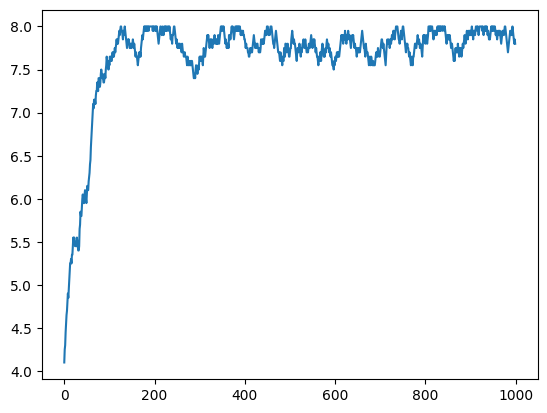

In [329]:
plt.plot(x[0])
print(x[1])

In [330]:
y = genetic_mab(20,8)

[1 1 1 1 1 1 1 1]


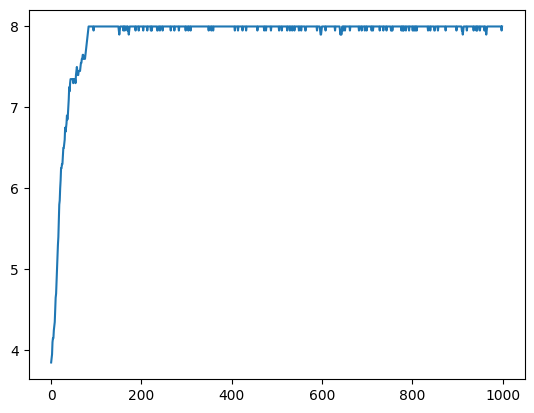

In [331]:
plt.plot(y[0])
print(y[2])

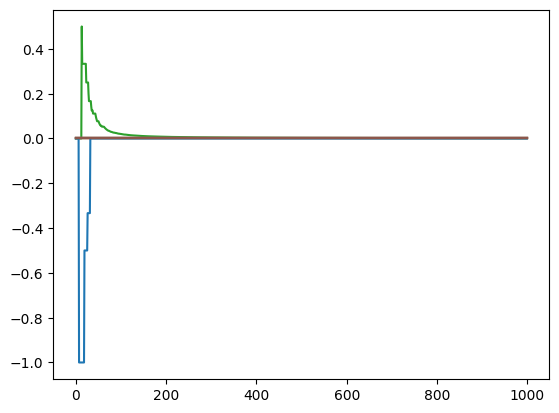

In [332]:
for i in y[1]:
    plt.plot(i)
plt.show()